# Data Science Capstone Project : Healthcare

<font size="5">Submitted By : <a href="https://www.linkedin.com/in/jay-shembekar-13b223146" >Jay Shembekar </a></font>

> ### Problem Statement

    NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
    The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
    Build a model to accurately predict whether the patients in the dataset have diabetes or not.

> ### Dataset Description

    The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

<table>
  <thead>
    <tr>
      <th>Variables</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Pregnancies</td>
      <td>Number of times pregnant</td>
    </tr>
    <tr>
      <td>Glucose</td>
      <td>Plasma glucose concentration in an oral glucose tolerance test</td>
    </tr>
    <tr>
      <td>BloodPressure</td>
      <td>Diastolic blood pressure (mm Hg)</td>
    </tr>
    <tr>
      <td>SkinThickness</td>
      <td>Triceps skinfold thickness (mm)</td>
    </tr>
    <tr>
      <td>Insulin</td>
      <td>Two hour serum insulin</td>
    </tr>
    <tr>
      <td>BMI</td>
      <td>Body Mass Index</td>
    </tr>
    <tr>
      <td>DiabetesPedigreeFunction</td>
      <td>Diabetes pedigree function</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Age in years</td>
    </tr>
    <tr>
      <td>Outcome</td>
      <td>Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0</td>
    </tr>
  </tbody>
</table>

<br>
<p style="font-family:Arial; font-size:1.5em; color:brown;"><b>Project Task : Week 1</b></p>

<u>Data Exploration:</u>


1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
<br>
• Glucose
<br>
• BloodPressure
<br>
• SkinThickness
<br>
• Insulin
<br>
• BMI
<br>
2. Visually explore these variables using histograms. Treat the missing values accordingly.
<br>
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

<p style="font-family:Arial; font-size:1.5em; color:brown;"><b>Project Task : Week 2</b></p>

<u>Data Exploration:</u>

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
<br>
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
<br>
3. Perform correlation analysis. Visually explore it using a heat map.

### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import dabl
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plot_metric.functions import BinaryClassification
import lime
import lime.lime_tabular
from pycaret import classification
from sklearn.impute import KNNImputer
import shap

In [2]:
df = pd.read_csv("health care diabetes.csv")

### Exploratory Data Analysis using Pandas Profiling (Generating HTML Report)

<p style="font-family: Courier; font-size:1.1em;">design_report<font color='purple'><b> = </b></font>ProfileReport(df)</p>
<p style="font-family: Courier; font-size:1.1em;">design_report.<font color='blue'>to_file</font>(<font color='brown'>"Pandas_Profiling_DS_Capstone_Healthcare.html"</font>)</p>

<br>
<p style="font-family:Arial; font-size:1.3em; color:brown;">Pandas Profiling Link : <a href="https://github.com/Jay-Shembekar/Data_Science_Capstone_Healthcare" >Pandas Profiling</a></p>

### Exploratory Data Analysis using Data Analysis Baseline Library (DABL)

In [3]:
df_clean = dabl.clean(df, verbose = 1)
df_clean

Detected feature types:
2 float, 7 int, 0 object, 0 date, 0 other
Interpreted as:
continuous      7
dirty_float     0
low_card_int    1
categorical     1
date            0
free_string     0
useless         0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
types = dabl.detect_types(df_clean)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Pregnancies,False,False,True,False,False,False,False
Glucose,True,False,False,False,False,False,False
BloodPressure,True,False,False,False,False,False,False
SkinThickness,True,False,False,False,False,False,False
Insulin,True,False,False,False,False,False,False
BMI,True,False,False,False,False,False,False
DiabetesPedigreeFunction,True,False,False,False,False,False,False
Age,True,False,False,False,False,False,False
Outcome,False,False,False,True,False,False,False


Target looks like classification
Linear Discriminant Analysis training set score: 0.737


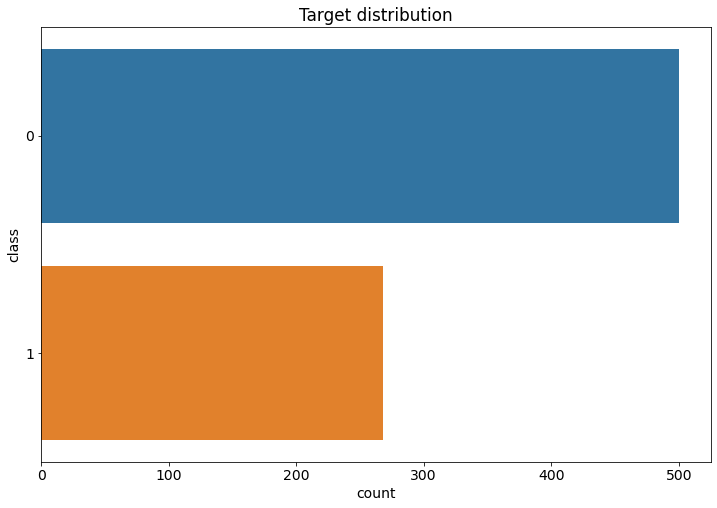

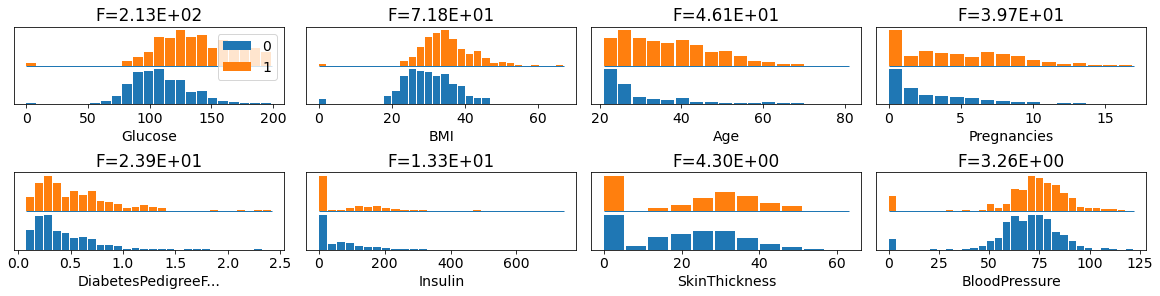

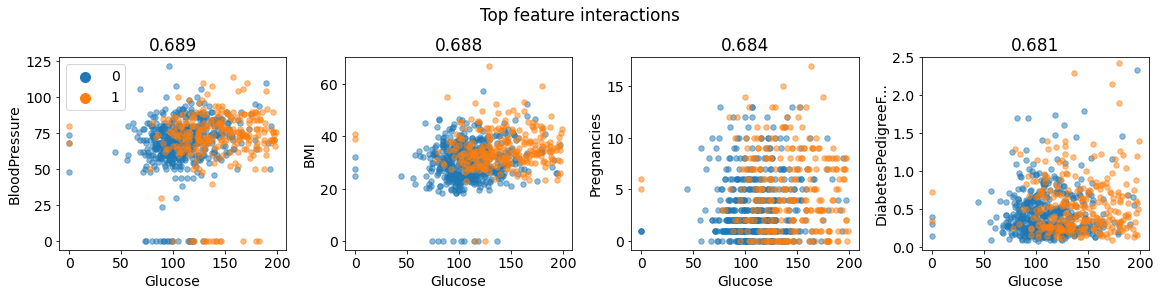

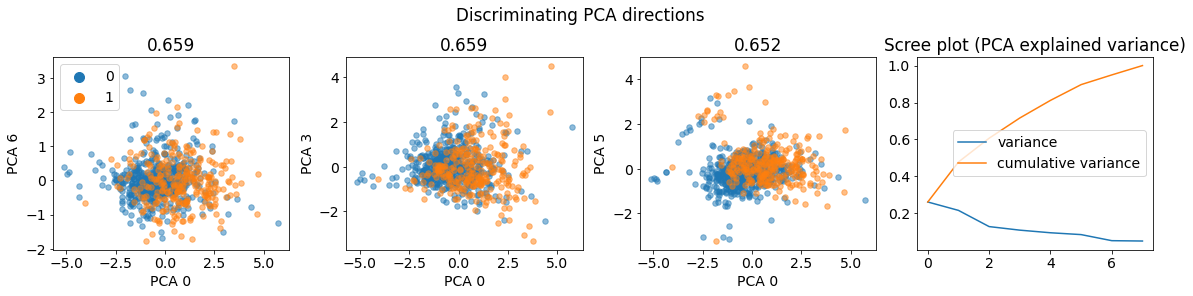

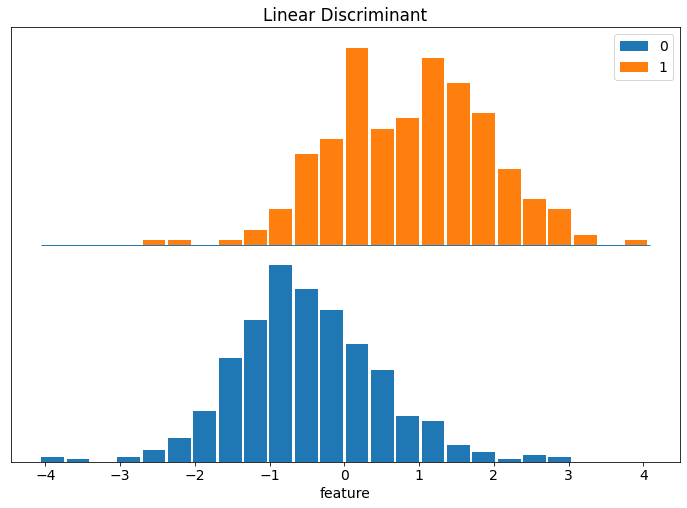

In [5]:
dabl.plot(df, target_col = "Outcome")

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Assuming "0" values are like Missing/NULL values, handling them to generate more value. 
<br>
- Since Pregnancies can be zero, there is no need of hamdling "0" for this feature.
</div>

In [6]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
print("Total Missing Values Count: ",df.isnull().sum().sum())

Total Missing Values Count:  652


## Missing Values Analysis using MissingNo

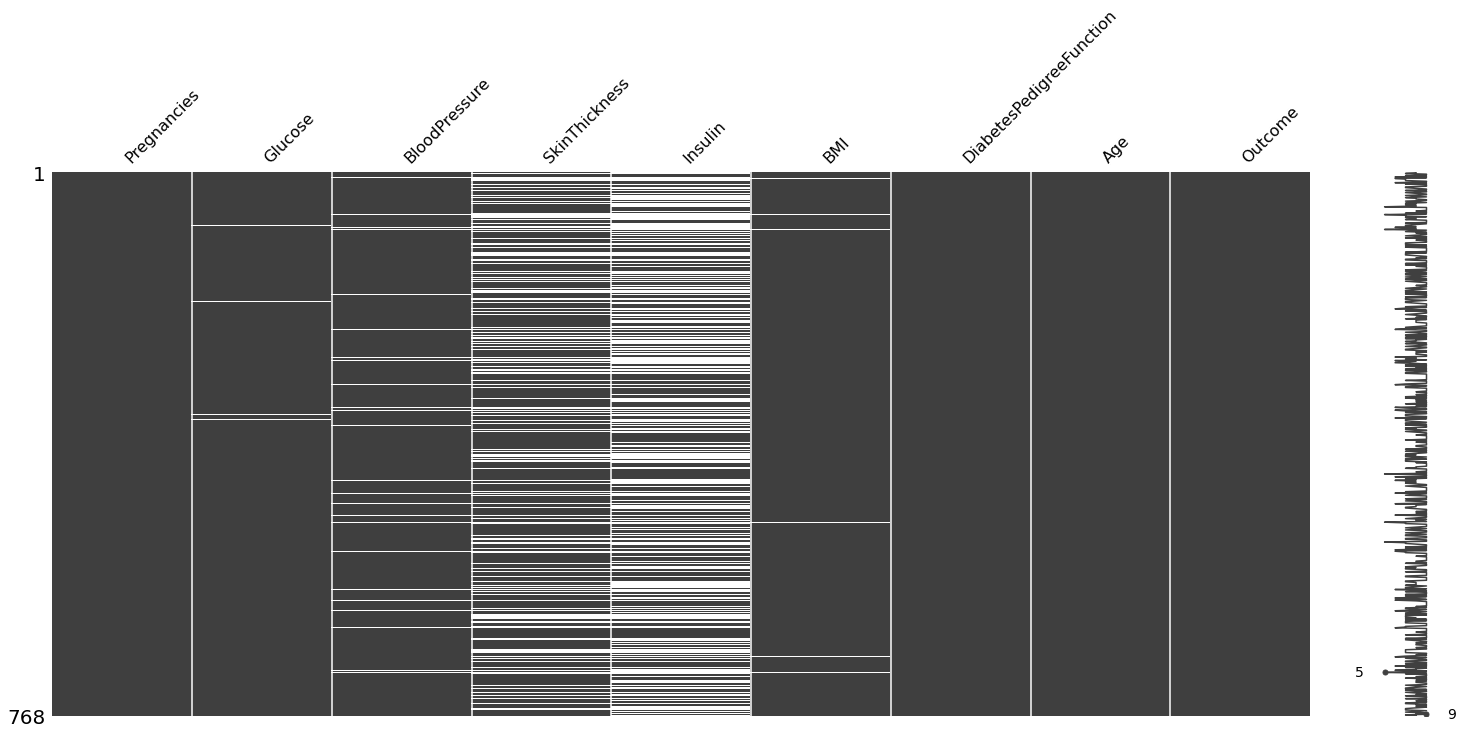

In [9]:
msno.matrix(df)
plt.show()

### Heatmap of Missing Values to visualize correlation

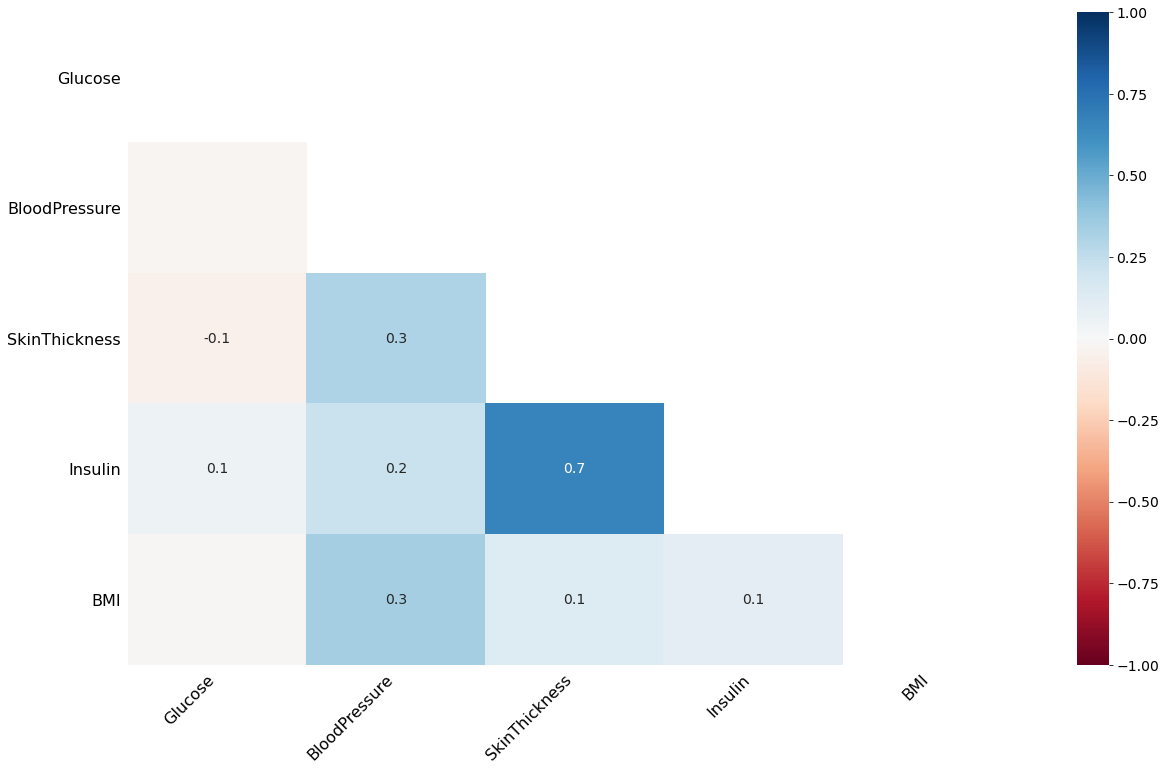

In [10]:
msno.heatmap(df)
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Pandas Profiling & MissingNo plot tells that most of the features have missing values with "Insulin" standing with 48% of missing data.
<br>
- To treat the missing values there are various methods. Let's treat the missing values using KNN imputation.
</div>

### Treating Null Values with KNN Imputation

In [11]:
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)
New_df = pd.DataFrame(df_filled, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                                            'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [12]:
New_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
New_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [14]:
New_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Feature Scaling using Standard Scalar Technique

In [15]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
autoscaler = StandardScaler()
New_df[features] = autoscaler.fit_transform(New_df[features])
New_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866296,-0.030443,0.624914,0.160899,0.170392,0.468492,1.425995,1.0
1,-0.844885,-1.200858,-0.522308,-0.012166,-0.961951,-0.846739,-0.365061,-0.190672,0.0
2,1.233880,2.014715,-0.686263,-0.351943,0.116148,-1.326243,0.604397,-0.105584,1.0
3,-0.844885,-1.069610,-0.522308,-0.649247,-0.601907,-0.628782,-0.920763,-1.041549,0.0
4,-1.141852,0.505364,-2.653723,0.624914,0.150728,1.550784,5.484909,-0.020496,1.0


### Pairplot for all the features except for the categorical feature.

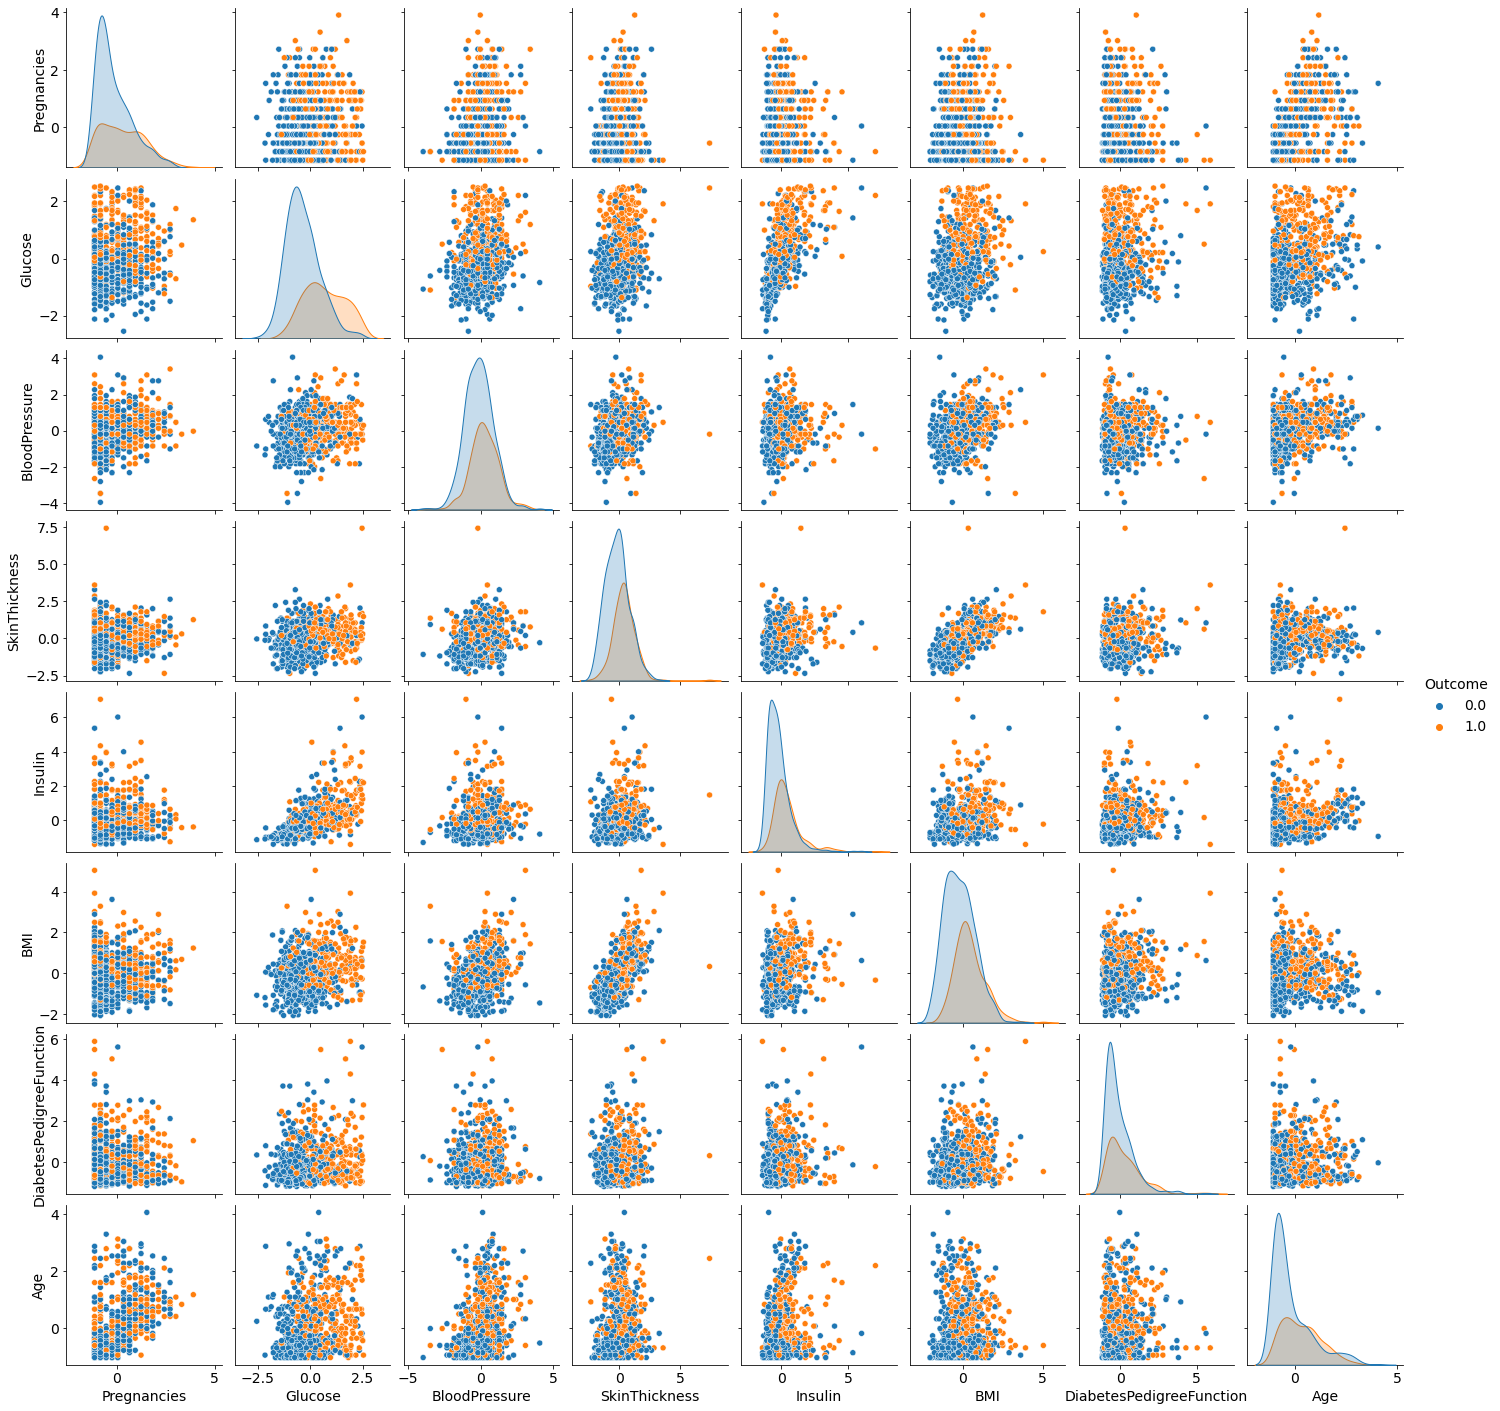

In [16]:
sns.pairplot(data = New_df, hue = 'Outcome')
plt.show()

### Correlation Heatmap for all the features except for the categorical feature.

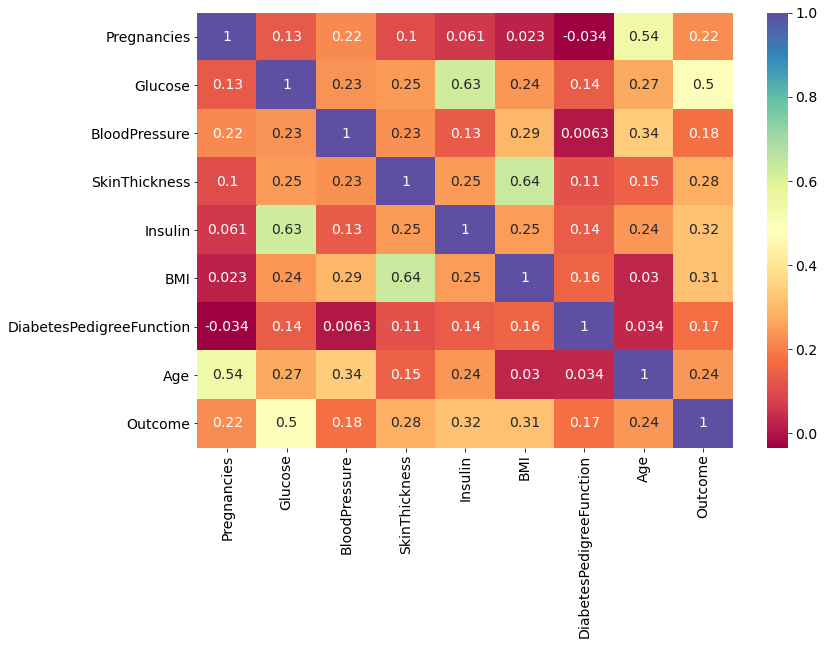

In [17]:
Corr = New_df.corr()
sns.heatmap(Corr, annot = True, cmap = "Spectral")
plt.show()

<br>
<p style="font-family:Arial; font-size:1.5em; color:brown;"><b>Project Task : Week 3</b></p>

<u>Data Modeling:</u>

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
<br>
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

### Machine Learning Model Building Approaches
### 1. Baseline Model using DABL SimpleClassifier

In [18]:
main_df = New_df.copy()

In [19]:
ec = dabl.SimpleClassifier(random_state = 50).fit(New_df, target_col = "Outcome") 
ec

Running DummyClassifier(strategy='prior')
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394

Running GaussianNB()
accuracy: 0.739 average_precision: 0.681 roc_auc: 0.819 recall_macro: 0.708 f1_macro: 0.710
=== new best GaussianNB() (using recall_macro):
accuracy: 0.739 average_precision: 0.681 roc_auc: 0.819 recall_macro: 0.708 f1_macro: 0.710

Running MultinomialNB()
accuracy: 0.651 average_precision: 0.531 roc_auc: 0.701 recall_macro: 0.500 f1_macro: 0.394
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.730 average_precision: 0.518 roc_auc: 0.713 recall_macro: 0.713 f1_macro: 0.708
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.730 average_precision: 0.518 roc_auc: 0.713 recall_macro: 0.713 f

SimpleClassifier(random_state=50)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Baseline Model tells that the Best Model is Decision Tree Classifier.
<br>
- Accuracy Score : 0.751.
<br>   
- ROC Curve (area : 0.828).
</div>

### Feature Importance using DABL on Best Model

Depth: 4
Number of leaves: 6


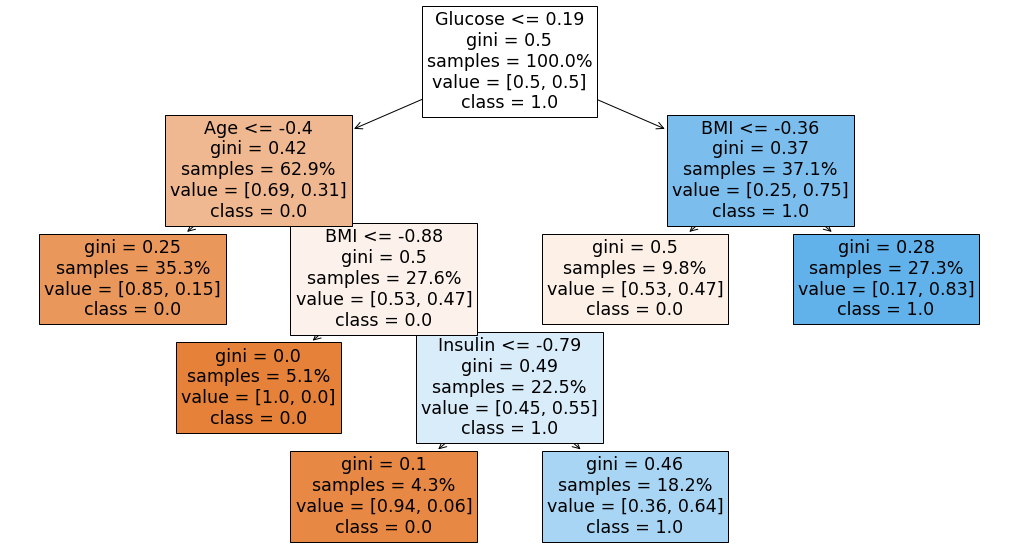

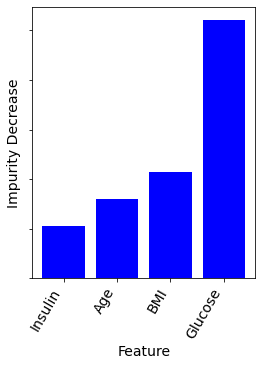

In [20]:
dabl.explain(ec)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Glucose is the highest contributing feature to determine Diabetes.
</div>

### 2. Ensemble Learning Model: Random Forest
Training Data: 70%

Test Data: 30%

In [21]:
RSEED = 50
target = np.array(New_df.pop('Outcome'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(New_df,
                                         target, 
                                         stratify = target,
                                         test_size = 0.3, 
                                         random_state = RSEED)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators = 100, random_state = RSEED, n_jobs = -1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

### Statistics about the trees in Random Forest

In [22]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 174
Average maximum depth 14


In [23]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


### Feature Importances given by Random Forest

                    Feature  Importance
1                   Glucose    0.223102
5                       BMI    0.152507
4                   Insulin    0.150431
7                       Age    0.121722
6  DiabetesPedigreeFunction    0.109538
3             SkinThickness    0.098795
2             BloodPressure    0.074858
0               Pregnancies    0.069047


<AxesSubplot:xlabel='Feature'>

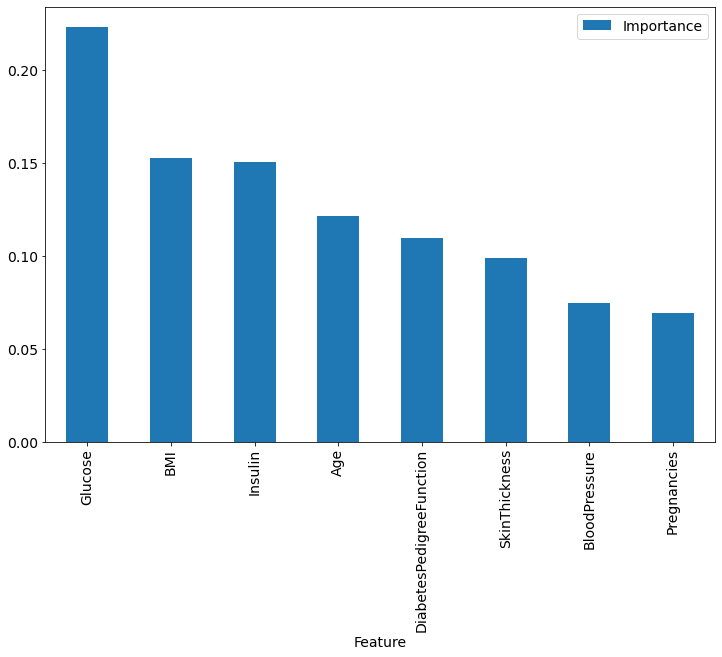

In [24]:
# Extract feature importances
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = model.feature_importances_
features.sort_values(by=['Importance'], ascending = False, inplace = True)
print(features)
features.set_index('Feature', inplace = True)
features.plot(kind = 'bar')

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Random Forest Model is concluding that Glucose is the highest contributing feature while Pregnancies is the lowest contributing feature in determining diabetes.
<br>
- Glucose remains the highest contributng feature for both, Best Model using DABL and Random Forest.
</div>

### Model Evaluation using Various Metrics
### ROC Curve

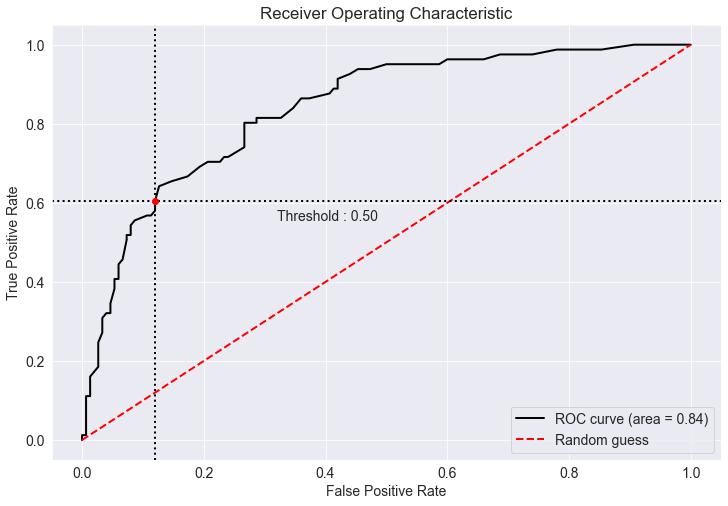

In [25]:
# Visualisation with plot_metric
bc = BinaryClassification(test_labels, rf_probs, labels = ["Class 1", "Class 2"])

# Figures
plt.figure()
bc.plot_roc_curve()
plt.show()

### Accuracy, Confusion Matrix, Precision, Recall, F1-Score

In [26]:
print("Accuracy {:.2%}".format(accuracy_score(test_labels,rf_predictions)))
print("Classification Report")
print (classification_report(test_labels,rf_predictions))
print ("Confusion matrix")
print (confusion_matrix(test_labels,rf_predictions))

Accuracy 77.92%
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       150
         1.0       0.73      0.59      0.65        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231

Confusion matrix
[[132  18]
 [ 33  48]]


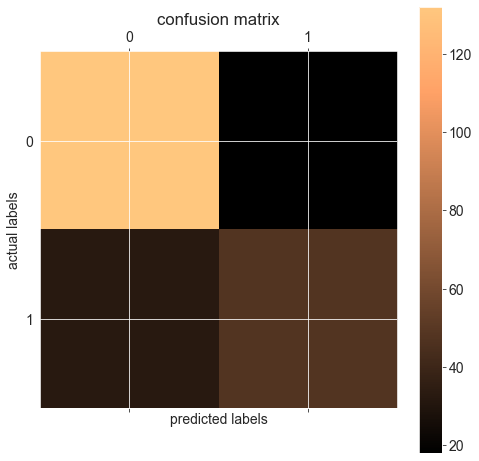

In [27]:
plt.matshow(confusion_matrix(test_labels,rf_predictions), cmap = plt.cm.copper, interpolation = 'nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('actual labels')
plt.xlabel('predicted labels')
plt.show()

### 3. Running Grid Search on Multiple Algorithms with Hypertuning Parameters

In [28]:
# Defining RFC(random forest classifier) model hyper-parameters
rfc_models = RandomForestClassifier()
rfc_params = {'n_estimators': [75,100,120],  
                      'max_depth': [25,30,40],
                      'min_samples_leaf': [4,6],
                      'min_samples_split': [4,6]}

# Defining LR(logistic regression) model hyper-parameters
lr_models = LogisticRegression()
lr_params = {'C': [0.1, 0.01],
                     'tol': [0.001, 0.01],
                     'max_iter': [1000, 2000]}

# Defining GBC(gradient boosting classifier) model hyper-parameters
gbc_models = GradientBoostingClassifier()
gbc_params = {'n_estimators': [25,50,100], 
              'learning_rate':[0.1,0.2,0.3],
                      'max_depth': [25,30],
                      'min_samples_leaf': [2,4],
                      'min_samples_split': [4,6,3]}


grid = zip([rfc_models, lr_models, gbc_models], [rfc_params, lr_params, gbc_params])

best_clf = None

# perform grid search and select the model with best cv set scores
for model_pipeline, param in grid:
    temp = GridSearchCV(model_pipeline, param_grid = param, cv = 3, n_jobs = -1)
    temp.fit(train, train_labels)
    if best_clf is None:
        best_clf = temp
    else:
        if temp.best_score_ > best_clf.best_score_:
            best_clf = temp

print ("Best CV Score",best_clf.best_score_)
print ("Model Parameters",best_clf.best_params_)
print("Best Estimator",best_clf.best_estimator_)

Best CV Score 0.7709497206703911
Model Parameters {'C': 0.1, 'max_iter': 1000, 'tol': 0.001}
Best Estimator LogisticRegression(C=0.1, max_iter=1000, tol=0.001)


### Best Model Prediction and Evaluation by Grid Search

In [29]:
predictions = best_clf.predict(test)
probs = best_clf.predict_proba(test)[:, 1]
print("Classification Report")
print (classification_report(test_labels,predictions))
print ("Confusion matrix")
print (confusion_matrix(test_labels,predictions))

Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       150
         1.0       0.74      0.49      0.59        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231

Confusion matrix
[[136  14]
 [ 41  40]]


Accuracy 76.19%


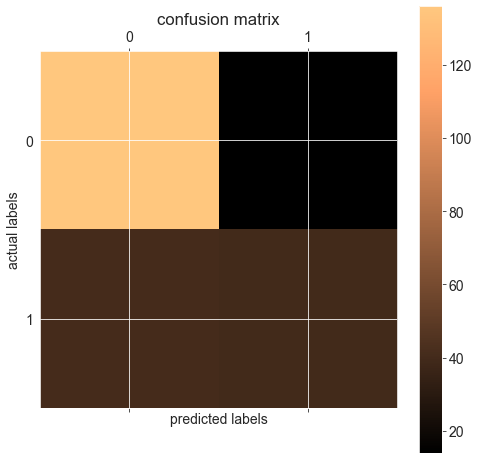

In [30]:
print("Accuracy {:.2%}".format(accuracy_score(test_labels,predictions)))
plt.matshow(confusion_matrix(test_labels,predictions), cmap=plt.cm.copper, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('actual labels')
plt.xlabel('predicted labels')
plt.show()

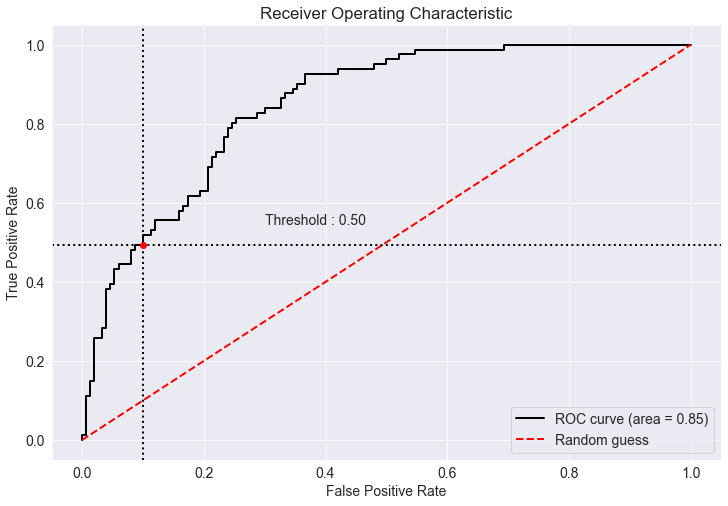

In [31]:
# Visualisation with plot_metric
bc = BinaryClassification(test_labels,probs, labels = ["Class 1", "Class 2"])

# Figures
plt.figure()
bc.plot_roc_curve()
plt.show()

In [32]:
print("Accuracy Score before Hypertuning {:.2%}".format(accuracy_score(test_labels,rf_predictions)))
print("Accuracy Score after Hypertuning {:.2%}".format(accuracy_score(test_labels,predictions)))

Accuracy Score before Hypertuning 77.92%
Accuracy Score after Hypertuning 76.19%


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Observation :</strong></font>
<br>

- Initially the Random Forest was giving a  ROC Curve (area = 0.84).
<br>
- Hypertuning Parameters has increased the ROC Curve (area = 0.85) but the Accuracy was reduced from 77.92 to 76.19%.
<br>
- Let's continue with more models to conclude which one to be selected for this classification problem.
</div>

In [33]:
pd.DataFrame({'Actual': test_labels, 'Predicted': predictions}).head()

,Actual,Predicted
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0


### 4. Machine Learning Model Comparison using PyCaret for further improvement.

In [39]:
classification_setup = classification.setup(data = main_df, target = 'Outcome')

,Description,Value
0,session_id,8437
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7729,0.8316,0.6170,0.7081,0.6542,0.4870,0.4934,1.5370
et,Extra Trees Classifier,0.7711,0.8325,0.6173,0.6963,0.6534,0.4835,0.4863,0.0400
lda,Linear Discriminant Analysis,0.7690,0.8440,0.5588,0.7272,0.6282,0.4652,0.4764,0.0090
ridge,Ridge Classifier,0.7672,0.0000,0.5482,0.7306,0.6222,0.4591,0.4721,0.0070
rf,Random Forest Classifier,0.7672,0.8360,0.5956,0.7036,0.6404,0.4708,0.4777,0.0460
lr,Logistic Regression,0.7671,0.8470,0.5535,0.7255,0.6243,0.4603,0.4718,0.1340
ada,Ada Boost Classifier,0.7654,0.7997,0.6216,0.6882,0.6492,0.4739,0.4785,0.0210
gbc,Gradient Boosting Classifier,0.7618,0.8234,0.6222,0.6880,0.6471,0.4684,0.4746,0.0240
qda,Quadratic Discriminant Analysis,0.7598,0.8232,0.5640,0.6957,0.6212,0.4484,0.4550,0.0080
nb,Naive Bayes,0.7561,0.8324,0.6228,0.6640,0.6415,0.4572,0.4586,0.0060


<br>
<p style="font-family:Arial; font-size:1.5em; color:brown;"><b>Project Task : Week 4</b></p>

<u>Data Modeling:</u>

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

<u>Data Reporting:</u>

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population
<br>
b. Scatter charts between relevant variables to analyze the relationships
<br>
c. Histogram or frequency charts to analyze the distribution of the data
<br>
d. Heatmap of correlation analysis among the relevant variables
<br>
e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

### Best Model is selected based on Overall Accuracy, AUC, Recall, Prec. and F1 score.

In [41]:
classification_cat = classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8331,0.5263,0.8333,0.6452,0.5123,0.5389
1,0.7963,0.8241,0.7368,0.7000,0.7179,0.5587,0.5591
2,0.7778,0.8556,0.6316,0.7059,0.6667,0.5008,0.5025
3,0.7963,0.8722,0.6316,0.7500,0.6857,0.5367,0.5410
4,0.7778,0.8165,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7593,0.8090,0.6842,0.6500,0.6667,0.4785,0.4788
6,0.6481,0.7113,0.4737,0.5000,0.4865,0.2192,0.2194
7,0.7925,0.8540,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7736,0.8778,0.6667,0.6667,0.6667,0.4952,0.4952
9,0.8113,0.8622,0.7368,0.7368,0.7368,0.5898,0.5898


### Saving the Best Model

<p style="font-family: Courier; font-size:1.1em;">classification.<font color='blue'>save_model</font>(classification_cat, <font color='brown'>'CatBoost_Classifier'</font>)</p>


<p style="font-family:Arial; font-size:1.3em; color:brown;">Tableau Dashboard Link : <a href="https://public.tableau.com/profile/jay4006#!/vizhome/DataScienceCapstone-Healthcare/DATASCIENCECAPSTONE-HEALTHCARE" >CLICK HERE</a></p>

<p style="font-family:Arial; font-size:1.3em; color:brown;">GitHub Link for Best Model with Interpretation : <a href="https://github.com/Jay-Shembekar/Data_Science_Capstone_Healthcare" >CLICK HERE</a></p>

